# Data Analysis(2)

The data is available [here](http://archive.ics.uci.edu/ml/datasets/Abalone)

----

## Instruction
- The data set is about the abalone.
- Number of examples: 4177

- Predicting the age of abalone from physical measurements.
- The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  
- Other measurements, which are easier to obtain, are used to predict the age.  
- Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Attributes

Given is the attribute name, attribute type, the measurement unit and a
brief description.  The number of rings is the value to predict: either
as a continuous value or as a classification problem.
   

|Name|Data Type|Meas.|Description|
|-|-|-|-|
|Sex		|nominal	| None |M, F, and I (infant)|
|Length		|continuous	|mm	|Longest shell measurement|
|Diameter	|continuous	|mm	|perpendicular to length|
|Height		|continuous	|mm	|with meat in shell|
|Whole weight	|continuous	|grams	|whole abalone|
|Shucked weight	|continuous	|grams	|weight of meat|
|Viscera weight	|continuous	|grams	|gut weight (after bleeding)|
|Shell weight	|continuous	|grams	|after being dried|
|Rings		|integer			|+1.5 |gives the age in years|

   Statistics for numeric domains:

|Length	|Diam|	Height|	Whole|	Shucked|	Viscera|	Shell|	Rings|
|-|-|-|-|-|-|-|-|
|Min	|0.075	|0.055	|0.000	|0.002	|0.001	|0.001	|0.002	    |1
|Max	|0.815	|0.650	|1.130	|2.826	|1.488	|0.760	|1.005	   |29
|Mean	|0.524	|0.408	|0.140	|0.829	|0.359	|0.181	|0.239	|9.934
|SD	|0.120	|0.099	|0.042	|0.490	|0.222	|0.110	|0.139	|3.224
|Correl	|0.557	|0.575	|0.557	|0.540	|0.421	|0.504	|0.628	  |1.0


   Class Distribution:

|Class|	Examples|Class|Examples|
|-----| --------|-----|-------|
|1|1|2|1
|3|	15|4|	57
|5|	115|6|	259
|7|	391|8|	568
|9|	689|10|634
|11| 487|12|267
|13|203|14|126
|15|103|16|67
|17|58|18|42
|19	|32|20	|26
|21	|14|22	|6
|23	|9|24	|2
|25	|1|26	|1
|27	|2|29	|1

-------

Total	4177


## Preprocessing
- For the `Sex` column, i prefer on-hot vectorization to setting three numbers for `M,F,I`
- For the `Rings` column, i didn't add 1.5 to it to get age but using the raw data instead

In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv("./abalone_data.txt", names=["Sex", "Length", "Diamter", "Height", 
    "WholeWeight", "ShuckedWeight", "VisceraWeight", "SellWeight", "Rings"])

# data.replace(to_replace="M", value="1", inplace=True)
# data.replace(to_replace="F", value="0", inplace=True)
# data.replace(to_replace="I", value="0.5", inplace=True)

Sex = data.pop("Sex")
I = Sex.copy()
I.replace(to_replace="I", value=1, inplace=True)
I.replace(to_replace="M", value=0, inplace=True)
I.replace(to_replace="F", value=0, inplace=True)

M = Sex.copy()
M.replace(to_replace="I", value=0, inplace=True)
M.replace(to_replace="M", value=1, inplace=True)
M.replace(to_replace="F", value=0, inplace=True)

F = Sex.copy()
F.replace(to_replace="I", value=0, inplace=True)
F.replace(to_replace="M", value=0, inplace=True)
F.replace(to_replace="F", value=1, inplace=True)

data.insert(0, "I", I)
data.insert(0, "F", F)
data.insert(0, "M", M)

print(data.columns)
print(data.corr())



Index(['M', 'F', 'I', 'Length', 'Diamter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'SellWeight', 'Rings'],
      dtype='object')
                      M         F         I    Length   Diamter    Height  \
M              1.000000 -0.512528 -0.522541  0.236543  0.240376  0.215459   
F             -0.512528  1.000000 -0.464298  0.309666  0.318626  0.298421   
I             -0.522541 -0.464298  1.000000 -0.551465 -0.564315 -0.518552   
Length         0.236543  0.309666 -0.551465  1.000000  0.986812  0.827554   
Diamter        0.240376  0.318626 -0.564315  0.986812  1.000000  0.833684   
Height         0.215459  0.298421 -0.518552  0.827554  0.833684  1.000000   
WholeWeight    0.252038  0.299741 -0.557592  0.925261  0.925452  0.819221   
ShuckedWeight  0.251793  0.263991 -0.521842  0.897914  0.893162  0.774972   
VisceraWeight  0.242194  0.308444 -0.556081  0.903018  0.899724  0.798319   
SellWeight     0.235391  0.306319 -0.546953  0.897706  0.905330  0.817338  

|Attributes|M|F|I|Length|Diamter|Height|WholeWeight|ShuckedWeight|VisceraWeight|SellWeight|Rings
|-|-|-|-|-|-|-|-|-|-|-|-|
|M|1.000000|-0.512528|-0.522541|0.236543|0.240376|0.215459|0.252038|0.251793|0.242194|0.235391|0.181831    
|F|-0.512528|1.000000|-0.464298|0.309666|0.318626|0.298421|0.299741|0.263991|0.308444|0.306319|0.250279 
|I|-0.522541|-0.464298|1.000000|-0.551465|-0.564315|-0.518552|-0.557592|-0.521842|-0.556081|-0.546953|-0.436063  
|Length|0.236543|0.309666|-0.551465|1.000000|0.986812|0.827554|0.925261|0.897914|0.903018|0.897706|0.556720 
|Diamter|0.240376|0.318626|-0.564315|0.986812|1.000000|0.833684|0.925452|0.893162|0.899724|0.905330|0.574660
|Height|0.215459|0.298421|-0.518552|0.827554|0.833684|1.000000|0.819221|0.774972|0.798319|0.817338|0.557467 
|WholeWeight|0.252038|0.299741|-0.557592|0.925261|0.925452|0.819221|1.000000|0.969405|0.966375|0.955355|0.540390    
|ShuckedWeight|0.251793|0.263991|-0.521842|0.897914|0.893162|0.774972|0.969405|1.000000|0.931961|0.882617|0.420884   
|VisceraWeight|0.242194|0.308444|-0.556081|0.903018|0.899724|0.798319|0.966375|0.931961|1.000000|0.907656|0.503819   
|SellWeight|0.235391|0.306319|-0.546953|0.897706|0.905330|0.817338|0.955355|0.882617|0.907656|1.000000|0.627574  
|Rings|0.181831|0.250279|-0.436063|0.556720|0.574660|0.557467|0.540390|0.420884|0.503819|0.627574|1.000000    



## Visualization
- Some preprocessing won't be done before the visualization as shown below.


In [2]:
# count the numbers of every class, which is included in the instruction.
# print(data.dtypes)
counts = []
for i in range(1, 30):
    count = data.loc[lambda df: df["Rings"] == float(i)]
    counts.append(count.shape[0])

print(counts)


[1, 1, 15, 57, 115, 259, 391, 568, 689, 634, 487, 267, 203, 126, 103, 67, 58, 42, 32, 26, 14, 6, 9, 2, 1, 1, 2, 0, 1]


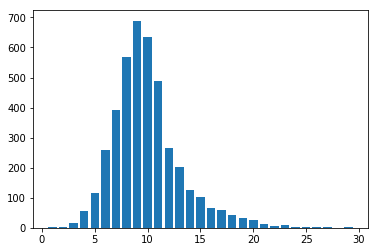

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(1, 30), counts)
plt.show()


- As you see the class distribution looks like the Gauss distribution, which we need to seperate the class like that 

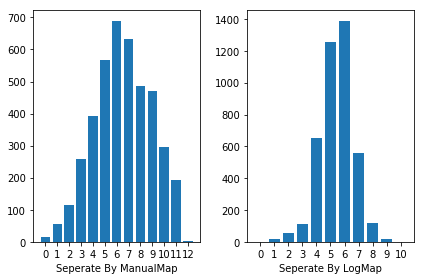

In [4]:




def ManualMap(x):
    array = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 29]
    for i in range(len(array)):
        if x <= array[0]:
            return 0
        if array[i] <= x <= array[i + 1]:
            return i + 1
        if x >= array[-1]:
            return len(array)
        
def LogMap(x):
    array = np.around(np.geomspace(1, 29, 13))
    for i in range(len(array)):
        if x <= array[0]:
            return 0
        if array[i] <= x <= array[i + 1]:
            return i + 1
        if x >= array[-1]:
            return len(array)

d1 = pd.DataFrame(data["Rings"].map(ManualMap)) #[i for i in map(fun, data["Rings"])
# print(d1.shape, d1.columns)

counts = []
for i in range(1, 30):
    count = d1.loc[lambda df: df["Rings"] == i].shape[0]
    if count != 0:
        counts.append(count)

plt.subplot("121")
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)))
plt.xlabel("Seperate By ManualMap")

data["Rings"] = data["Rings"].map(LogMap) #[i for i in map(fun, data["Rings"])

counts = []
for i in range(1, 30):
    count = data.loc[lambda df: df["Rings"] == i].shape[0]
    if count != 0:
        counts.append(count)

plt.subplot("122")
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)))
plt.xlabel("Seperate By LogMap")

plt.tight_layout()
plt.show()

#data["Rings"] = d1

data = data.values.astype(np.float)

- Here you can see that with `ManualMap` seperating the classes into 13 classes, and the result will be disperse.
- While divide the class into 13 classes with `LogMap`, it looks more likely the Gauss distribution.

## Model builting

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


mms = MinMaxScaler()
mms.fit_transform(data[:, :-1])

X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.3)

def getScore(clf, X_test, y_test):
    yPre = np.round(clf.predict(X_test))
    # print(np.hstack((yPre, y_test.reshape(X_test.shape[0], 1))))
    acc = (yPre == y_test)
    print(f"{np.mean(acc) * 100:*^20}")


clf = SVC(gamma=10)
#clf = GradientBoostingClassifier(n_estimators=50, max_depth=2, learning_rate=0.5)

clf.fit(X_train, y_train)
getScore(clf, X_test, y_test)
getScore(clf, X_train, y_train)

print(cross_val_score(clf, X_test, y_test))





*54.066985645933016*
*54.567225453301404*
[0.5452381  0.51913876 0.56971154]


- It turns out that seperate into 13 classes is still to many for the classifiers to work with.You can try the 3-classes method to retrain the model, and the accuracy will be better than 80%.
- According to the offical suggestion, KNN and SVM working on the raw data, which has 20+ classes, get poor result.
- BTW: If you want to get better result try manualy seperate with array\[1, 3 ,5, 8, 11, 29\]

## Summary
- The data sets beat me at the first place.For a long time, i have been working on Iris data set, which many classifier can do quite a good job.
- It reminded me of the importance of the accuracy of the training set and `cross_validation` result